In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np


In [10]:
model1 = models.load_model('FullPictute.h5')
model2 = models.load_model('car_net_simple_AUG_8655.h5')
model3 = models.load_model('car_net_simple_8146.h5')

In [12]:
img = image.load_img('photo_5463422134404628049_y.jpg', target_size = (126,224))

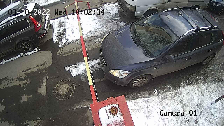

In [13]:
img

In [14]:
ar_im = image.img_to_array(img)
ar_im = np.expand_dims(ar_im, axis = 0)

In [15]:
ar_im = ar_im/255 
pr1 = model1.predict(ar_im)
pr2 = model2.predict(ar_im)
pr3 = model3.predict(ar_im)

1/1 [==============================] - 4s 4s/step


In [21]:
#мягкое голосование
pr = (pr1 +pr2 +pr3)/3
# коэффициенты подбираются нами в данном случае 

In [22]:
pr.argmax()

5

In [25]:
#твердое голосование
from scipy import stats
a = np.array([pr1.argmax(), pr2.argmax(), pr3.argmax()])

stats.mode(a).mode[0]

5

In [26]:
def get_topK(a, topK):
    # вектор с прогнозами и сколько параметров хотим отобрать
    
    res = {}
    vec = a.copy()
    
    for i in range(topK):
        k = vec.argmax()
        res[k] = vec[k]
        vec[k] = -1

    return res

In [34]:
t1 = get_topK(pr1[0], 5)

In [35]:
pr1.shape

(1, 9)

In [36]:
t2 = get_topK(pr2[0], 5)

In [37]:
t3 = get_topK(pr2[0], 5)

In [38]:
t1

{5: 0.8910972, 6: 0.032825846, 2: 0.031246359, 3: 0.029253658, 1: 0.011085833}

In [39]:
t2

{5: 0.7349416,
 7: 0.24110205,
 8: 0.018916992,
 1: 0.0025964582,
 6: 0.00088277383}

In [40]:
t3

{5: 0.7349416,
 7: 0.24110205,
 8: 0.018916992,
 1: 0.0025964582,
 6: 0.00088277383}

In [41]:
def construct_ranks(rr):
    res = {}
    for r in rr:
        for k in r:
            if k in res.keys():
                res[k]['rank'] += 1
                res[k]['value'] += r[k]
            else:
                res[k] = {'rank':1, 'value':r[k]} 
        
    return res

In [42]:
construct_ranks([t1,t2,t3])

{5: {'rank': 3, 'value': 2.3609805},
 6: {'rank': 3, 'value': 0.034591395},
 2: {'rank': 1, 'value': 0.031246359},
 3: {'rank': 1, 'value': 0.029253658},
 1: {'rank': 3, 'value': 0.01627875},
 7: {'rank': 2, 'value': 0.4822041},
 8: {'rank': 2, 'value': 0.037833985}}

In [43]:
def multiply_ranks(rr):
    res = {}
    for r in rr:
        res[r] = rr[r]['rank']*rr[r]['value']
        
    return res

In [44]:
 multiply_ranks(construct_ranks([t1,t2,t3]))

{5: 7.08294153213501,
 6: 0.10377418622374535,
 2: 0.031246358528733253,
 3: 0.029253657907247543,
 1: 0.048836247995495796,
 7: 0.9644082188606262,
 8: 0.07566796988248825}

In [46]:
#max(pr, key=pr.get)  

# ????


AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [ ]:
#ПИШЕМ КЛАСС  STACK
#PYSH, POP МЕТОДЫ
#
#

In [58]:
class Stack():
    def __init__(self):
        self.__body =[]
        self.__count=0
        
    def pop(self):
        if self.__count>0:
            self.__count -=1
            return self.__body.pop()
        else:
            return "empty"
        
    def push(self,a):
        self.__body.append(a)
        self.__count +=1
        
    def get_counts(self):
        return self.__count
        
            
        
        

In [61]:
st = Stack()

In [62]:
for i in range(10):
    st.push(i)

In [63]:
st.push('string')

In [64]:
st.get_counts()

11

In [65]:
for i in range(st.get_counts()):
    print(st.pop())
    

string
9
8
7
6
5
4
3
2
1
0


In [66]:
st.pop()

'empty'

# class QUEUE

In [70]:
# абстрактный класс
class Structure():
    
    def __init__(self):
        self.__body =[]
        self.__count=0
        
        
    def push(self,a):
        self.__body.append(a)
        self.__count +=1
        
    def get_counts(self):
        return self.__count
        

In [71]:
class Stack():
    
        
    def pop(self):
        if self.__count>0:
            self.__count -=1
            return self.__body.pop()
        else:
            return "empty"
        

        
            
        

In [72]:
class Queue():
    
        
    def pop(self):
        if self.__count>0:
            self.__count -=1
            return self.__body.pop(0)
        else:
            return "empty"
        


In [73]:
st = Queue()

In [74]:
for i in range(10):
    st.push(i)

AttributeError: 'Queue' object has no attribute 'push'

In [ ]:
st.push('string')

In [ ]:
st.get_counts()

In [ ]:
for i in range(st.get_counts()):
    print(st.pop())
    

In [67]:
a = [1,2,3,4,5,6,7]

In [68]:
a.pop(0)

1

In [69]:
a

[2, 3, 4, 5, 6, 7]

# ГРАФЫ

In [ ]:
представление графа в памяти

In [75]:
img1 = image.load_img('photo_5463422134404628196_x.jpg', target_size = (126,224))

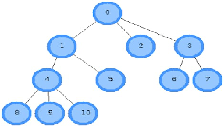

In [76]:
img1

In [77]:
import numpy as np

In [78]:
gr = np.zeros((11,11))

In [79]:
gr[0,1]=gr[1,0]=gr[0,2]=gr[2,0]=gr[0,3]=gr[3,0]=1

In [80]:
s = [1,2,3,4,5,6,7,8,9,10]

In [81]:
s[0] = [1,2,3]

In [82]:
s[1]=[0,4,5]

s[2]=[0]
s[3]=[0,6,7]
s[4]=[1,8,9,10]
s[5]=[1]
s[6]=[3]
s[7]=[3]
s[8]=[4]
s[9]=[4]
s[10]=[4]

# это граф как список списков!!!!!
# это представление в памяти графа

# ПОИСК В ШИРИНУ БЫЛО!----- УДОБНО ПРИМЕНЯТЬ ВЫШЕ ОЧЕРЕДЬ!!!!
#ПОИСК КРАТЧАЙШЕГО ПУТИ

IndexError: list assignment index out of range

# ПРИМЕР ГРАФА РЕАЛИЗАЦИИ С ОЧЕРЕДЬЮ

In [83]:
start = 0
D = [None] * 11
D[start] = 0
Q = Queue()
Q.push(start)
trace = [start]

while Q.get_counts()>0:
    u = Q.pop()
    for v in s[u]: 
        if D[v] is None: 
            D[v] = D[u] + 1 
            Q.push(v)
            trace.append(v)


AttributeError: 'Queue' object has no attribute 'push'

In [ ]:
D

In [ ]:
#это порядок обработки
trace